##### **NAMA : SHELOMITA YOHELLIA**
##### **NIM : 2209106019**
##### **KELAS : A1 2022**
#### **POSTTEST 7 - KECERDASAN BUATAN**
##### Link : https://www.kaggle.com/datasets/mdsagorahmed/fruit-image-dataset-22-classes

##### Import Library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Membaca dataset img

In [2]:
base_dir = r'C:\Users\Shelom\Documents\KECERDASAN BUATAN\POSTTEST_KB_7\mango'

In [9]:
splitfolders.ratio(base_dir,
                    output="dataset_final",
                   seed=1337,
                   ratio=[.8,.1,.1])

In [10]:
train_img_path = r'C:\Users\Shelom\Documents\KECERDASAN BUATAN\POSTTEST_KB_7\dataset_final\train'
test_img_path = r'C:\Users\Shelom\Documents\KECERDASAN BUATAN\POSTTEST_KB_7\dataset_final\test'
validation_img_path = r'C:\Users\Shelom\Documents\KECERDASAN BUATAN\POSTTEST_KB_7\dataset_final\val'
class_names = os.listdir(train_img_path)

##### Read Dataset dan Melakukan Split Dataset Menjadi Train,Validation, dan Test

In [11]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [12]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary' # jika hanya ada 2 Kelas memakai binary (Matang |Ripe| dan Unripe |Tidak Matang|)
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    validation_img_path,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary',
)

Found 368 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


##### Menampilkan nama kelas dataset

In [13]:
class_names

['ripe mango', 'unripe mango']

##### Menampilkan batch gambar dari train generator

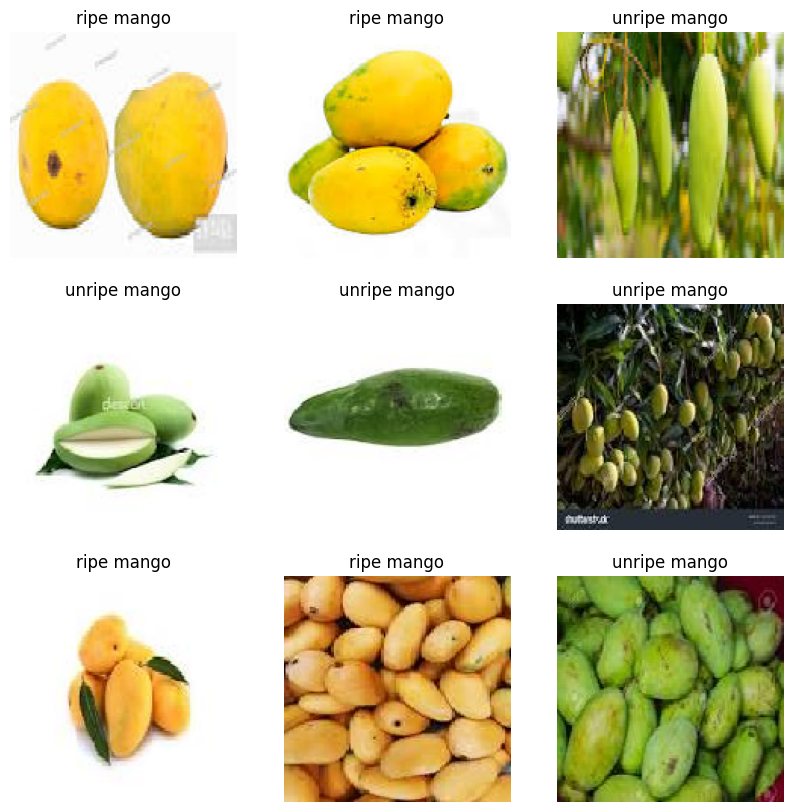

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

##### Model Sequential

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

##### Model Compile

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(  
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
3/3 [==============================] - 134s 51s/step - loss: 0.8495 - accuracy: 0.5842 - val_loss: 0.6928 - val_accuracy: 0.6304
Epoch 2/100
3/3 [==============================] - 183s 55s/step - loss: 0.6913 - accuracy: 0.6304 - val_loss: 0.6769 - val_accuracy: 0.6304
Epoch 3/100
3/3 [==============================] - 183s 56s/step - loss: 0.6533 - accuracy: 0.6304 - val_loss: 0.6086 - val_accuracy: 0.6304
Epoch 4/100
3/3 [==============================] - 101s 33s/step - loss: 0.5466 - accuracy: 0.6304 - val_loss: 0.4676 - val_accuracy: 0.6304
Epoch 5/100
3/3 [==============================] - 148s 45s/step - loss: 0.4460 - accuracy: 0.6304 - val_loss: 0.3530 - val_accuracy: 0.6304
Epoch 6/100
3/3 [==============================] - 92s 30s/step - loss: 0.3844 - accuracy: 0.6304 - val_loss: 0.3038 - val_accuracy: 0.6304
Epoch 7/100
3/3 [==============================] - 86s 30s/step - loss: 0.3642 - accuracy: 0.7826 - val_loss: 0.3328 - val_accuracy: 1.0000
Epoch 8/100
3/3

##### Model Evaluasi

In [19]:
model.evaluate(test_generator)

1/1 [==============================] - 3s 3s/step - loss: 0.4751 - accuracy: 0.9362


[0.47514283657073975, 0.936170220375061]

##### Grafik Pergerakan Metrik Akurasi dan Loss Training Validation

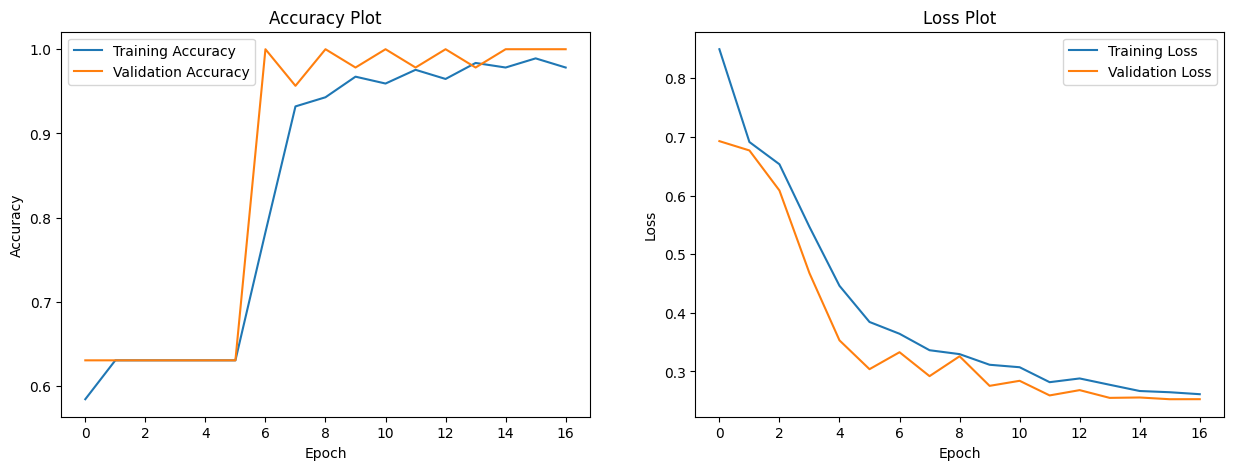

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### Menampilkan Hasil Prediksi Model

In [21]:
from PIL import Image
import numpy as np
from skimage import transform 

In [25]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'C:\Users\Shelom\Documents\KECERDASAN BUATAN\POSTTEST_KB_7\dataset_final\train\unripe mango\1.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 233ms/step


In [26]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred

array([['Unripe']], dtype='<U6')

In [27]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'C:\Users\Shelom\Documents\KECERDASAN BUATAN\POSTTEST_KB_7\dataset_final\train\ripe mango\7.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 449ms/step


In [28]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred

array([['Ripe']], dtype='<U6')